In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
dados = {
    'Idade': [16, 25, 39, 45, 49, 64, 70],
    'Pressão sistólica': [109, 122, 143, 132, 199, 185, 199]
}

In [3]:
df = pd.DataFrame(dados)

In [4]:
df.shape

(7, 2)

In [5]:
df.head()

,Idade,Pressão sistólica
0,16,109
1,25,122
2,39,143
3,45,132
4,49,199


In [6]:
df.describe()

,Idade,Pressão sistólica
count,7.000000,7.000000
mean,44.000000,155.571429
std,19.459359,37.964269
min,16.000000,109.000000
25%,32.000000,127.000000
50%,45.000000,143.000000
75%,56.500000,192.000000
max,70.000000,199.000000


**1. Faça um gráfico de dispersão dos dados.**

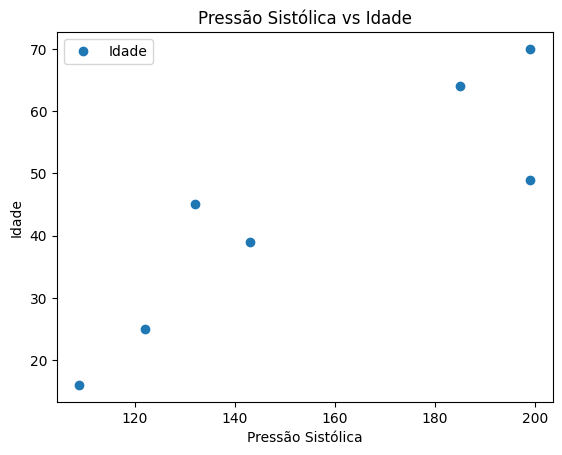

In [7]:
df.plot(x='Pressão sistólica', y='Idade', style='o')
plt.title('Pressão Sistólica vs Idade')
plt.xlabel('Pressão Sistólica')
plt.ylabel('Idade')
plt.show()

**2. Quais foram suas observações? Há correlação entre os dados?**

In [8]:
print('Correlação: %0.5f' % pearsonr(df['Pressão sistólica'], df['Idade'])[0])

Correlação: 0.88346


Sim, vejo uma relação linear positiva. A pressão sistólica tende a ser mais alta conforme a idade mais avançada.

**3. Obtenha a Inclinação e o Intercepto, e a equação da reta de regressão.**

In [9]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 1].values
(X, y)

(array([[16],
        [25],
        [39],
        [45],
        [49],
        [64],
        [70]]),
 array([109, 122, 143, 132, 199, 185, 199]))

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [11]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [12]:
print('Inclinação:', regressor.coef_[0])
print('Intercepto:', regressor.intercept_)
print(f'Equação da reta: Y = {regressor.coef_[0]:.2f} * X + {regressor.intercept_:.2f}')

Inclinação: 1.749662800107904
Intercepto: 79.76342055570544
Equação da reta: Y = 1.75 * X + 79.76


**4. Faça a avaliação da qualidade do modelo de regressão linear.**

In [13]:
y_pred = regressor.predict(X_test)

In [14]:
pred_df = pd.DataFrame({'Esperado': y_test, 'Previsto': y_pred})
pred_df

,Esperado,Previsto
0,199,202.239817
1,143,148.000270


In [15]:
print('MAE - Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE - Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE - Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2:', metrics.r2_score(y_test, y_pred))

MAE - Mean Absolute Error: 4.12004316158621
MSE - Mean Squared Error: 17.749554517736463
RMSE - Root Mean Squared Error: 4.213022017238512
R2: 0.9773602620947239
